In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

## Load Dataset

In [119]:
#Load the additives data
df_additives = pd.read_csv('../data/cleaned_data/addtitives_processed.csv')
df_additives.head()

,ingredient,purpose,health_concern,alternative_names,bad_ingredients,bad_ingredients_preprocessed
0,Acesulfame potassium,Sweetener,"Cancer, Hormone Disruption, Risks to Pregnant ...","Ace-K, Acesulfame K, E950,Sunett","Acesulfame potassium,Ace-K, Acesulfame K, E950...","acesulfame potassium, ace-k, acesulfame k, e95..."
1,Allura Red AC,Coloring,May cause hyperactivity in children.,"E129,Red 40","Allura Red AC,E129,Red 40","allura red ac, e129, red 40"
2,Aloe vera,Flavoring,Cancer,"Aloe barbadensis, Aloe leaf extract","Aloe vera,Aloe barbadensis, Aloe leaf extract","aloe vera, aloe barbadensis, aloe leaf extract"
3,Amaranth,Coloring,carcinogenic effects,"E123,Red No. 2","Amaranth,E123,Red No. 2","amaranth, e123, red no. 2"
4,Aspartame,Sweetener,"Cancer,Linked to headaches, dizziness","Equal, NutraSweet, E951, AminoSweet","Aspartame ,Equal, NutraSweet, E951, AminoSweet","aspartame, equal, nutrasweet, e951, aminosweet"


In [120]:
#Load the food products dataset
df_food = pd.read_csv('../data/cleaned_data/food_processed.csv')
df_food.head()

,brands,product_name,categories,countries,food_groups_tags,food_groups,ingredients_text,category_name,country,processed_ingredients
0,"Mutti,POLPA",pulpe de tomates,"Pflanzliche Lebensmittel und Getränke,Pflanzli...","Australien,Österreich,Belgien,Kanada,Frankreic...","['en:fruits-and-vegetables', 'en:vegetables']",en:vegetables,"tomatoes 99.8%, salt",Plant-based foods and beverages,canada,"tomatoes 99.8%, salt"
1,"Maïzena, Unilever",Maizena Fleur de Maïs Sans Gluten 400g,"Plant-based foods and beverages, Plant-based f...","Belgique, Canada, France, Martinique, La Réuni...","['en:cereals-and-potatoes', 'en:cereals']",en:cereals,Amidon de maïs.,Plant-based foods and beverages,canada,amidon de maïs.
2,Barilla,Lasagne all'uovo,"Cibi e bevande a base vegetale, Cibi a base ve...","Belgium,Canada,Croatia,France,Germany,Greece,H...","['en:cereals-and-potatoes', 'en:cereals']",en:cereals,"Semola di grano duro, uova fresche di categori...",Plant-based foods and beverages,canada,"semola di grano duro, uova fresche di categori..."
3,Tipiak,Fine chapelure de pain,"Aliments et boissons à base de végétaux,Alimen...","Canada,France","['en:cereals-and-potatoes', 'en:bread']",en:bread,"Farine de blé (gluten), sel, levure, Traces po...",Plant-based foods and beverages,canada,"farine de blé (gluten), sel, levure, traces po..."
4,"Zespri,Sungold,Catania,ALDI Zespri",Kiwi Sungold,"Aliments et boissons à base de végétaux,Alimen...","Belgique,Canada,France,Allemagne,Pologne,Espag...","['en:fruits-and-vegetables', 'en:fruits']",en:fruits,Kiwifruit,Plant-based foods and beverages,canada,kiwifruit


### Labelling food product based on the ingredients as healthy and not healthy


In [122]:
# bad ingredients into a single set
bad_ingredients_set = set()
df_additives['bad_ingredients_preprocessed'].str.split(', ').apply(bad_ingredients_set.update)
bad_ingredients_set.discard('')
bad_ingredients_set

{'ace-k',
 'acesulfame k',
 'acesulfame potassium',
 'ada',
 'allura red ac',
 'aloe barbadensis',
 'aloe leaf extract',
 'aloe vera',
 'amaranth',
 'aminosweet',
 'antioxidant 319',
 'aspartame',
 'azodicarbonamide',
 'azorubine',
 'benzoic acid salt',
 'bha',
 'bht',
 'black pn',
 'blue 1',
 'brilliant black bn',
 'brilliant blue fcf.',
 'bromated flour',
 'bromic acid potassium salt',
 'brominated palm oil',
 'brominated soybean oil',
 'brominated vegetable fat',
 'brominated vegetable oil',
 'butylated hydroxyanisole',
 'butylated hydroxytoluene',
 'bvo',
 'calcium bisulfite',
 'calcium propionate',
 'calcium sulfite',
 'cap',
 'caramel color',
 'caramel coloring',
 'caramel colour.',
 'carboxymethylcellulose',
 'carmoisine',
 'carrageenan',
 'chile saltpeter',
 'chloramphenicol',
 'cochineal red a',
 'cyclamate',
 'cyclamates',
 'cyclamic acid',
 'dough conditioner',
 'e102',
 'e110',
 'e122',
 'e123',
 'e124',
 'e127',
 'e129',
 'e133',
 'e150c',
 'e150d',
 'e151',
 'e171',
 'e20

In [123]:
#function to assign health_label based on the presence of bad ingredients in food database ingredient_list

def health_label(ingredients_text):
    # split the preprocessed ingredient text
    product_ingredients = set(ingredients_text.split(', '))
    # discard any empty strings 
    product_ingredients.discard('')
    # check for product ingredients in the set of bad ingredients
    if product_ingredients & bad_ingredients_set:
        return 'unhealthy'
    else:
        return 'healthy'


In [124]:

df_food['health_label'] = df_food['processed_ingredients'].apply(health_label)
df_food.head()

,brands,product_name,categories,countries,food_groups_tags,food_groups,ingredients_text,category_name,country,processed_ingredients,health_label
0,"Mutti,POLPA",pulpe de tomates,"Pflanzliche Lebensmittel und Getränke,Pflanzli...","Australien,Österreich,Belgien,Kanada,Frankreic...","['en:fruits-and-vegetables', 'en:vegetables']",en:vegetables,"tomatoes 99.8%, salt",Plant-based foods and beverages,canada,"tomatoes 99.8%, salt",healthy
1,"Maïzena, Unilever",Maizena Fleur de Maïs Sans Gluten 400g,"Plant-based foods and beverages, Plant-based f...","Belgique, Canada, France, Martinique, La Réuni...","['en:cereals-and-potatoes', 'en:cereals']",en:cereals,Amidon de maïs.,Plant-based foods and beverages,canada,amidon de maïs.,healthy
2,Barilla,Lasagne all'uovo,"Cibi e bevande a base vegetale, Cibi a base ve...","Belgium,Canada,Croatia,France,Germany,Greece,H...","['en:cereals-and-potatoes', 'en:cereals']",en:cereals,"Semola di grano duro, uova fresche di categori...",Plant-based foods and beverages,canada,"semola di grano duro, uova fresche di categori...",healthy
3,Tipiak,Fine chapelure de pain,"Aliments et boissons à base de végétaux,Alimen...","Canada,France","['en:cereals-and-potatoes', 'en:bread']",en:bread,"Farine de blé (gluten), sel, levure, Traces po...",Plant-based foods and beverages,canada,"farine de blé (gluten), sel, levure, traces po...",healthy
4,"Zespri,Sungold,Catania,ALDI Zespri",Kiwi Sungold,"Aliments et boissons à base de végétaux,Alimen...","Belgique,Canada,France,Allemagne,Pologne,Espag...","['en:fruits-and-vegetables', 'en:fruits']",en:fruits,Kiwifruit,Plant-based foods and beverages,canada,kiwifruit,healthy


In [125]:
#check for unhealthy food labels
unhealthy_entries = df_food[df_food['health_label'] == 'not healthy']
unhealthy_entries

,brands,product_name,categories,countries,food_groups_tags,food_groups,ingredients_text,category_name,country,processed_ingredients,health_label


## EDA

Our food dataset provides detailed information about food products, including brands, product names, categories, and the countries where they are available. It includes food groups and classification tags, along with detailed ingredient lists. The dataset features a processed_ingredients column, which provides a cleaned and standardized version of the ingredient data for easier analysis. Additionally, a health_label indicates whether a product is considered healthy, based on the presence of ingredients linked to health concerns. This dataset is well-suited for analyzing food products, their nutritional content, and health implications, supporting meaningful insights and recommendations.

### Data Overview

#### Shape of data

In [130]:
df_food.shape

(25728, 11)

#### Data Types and Feature Descriptions

In [132]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25728 entries, 0 to 25727
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   brands                 25103 non-null  object
 1   product_name           25457 non-null  object
 2   categories             25728 non-null  object
 3   countries              25728 non-null  object
 4   food_groups_tags       25728 non-null  object
 5   food_groups            24971 non-null  object
 6   ingredients_text       25728 non-null  object
 7   category_name          25728 non-null  object
 8   country                25728 non-null  object
 9   processed_ingredients  25728 non-null  object
 10  health_label           25728 non-null  object
dtypes: object(11)
memory usage: 2.2+ MB


### Missing and Duplicate values


#### Missing data

In [135]:
df_food.isna().sum()

brands                   625
product_name             271
categories                 0
countries                  0
food_groups_tags           0
food_groups              757
ingredients_text           0
category_name              0
country                    0
processed_ingredients      0
health_label               0
dtype: int64

In [136]:
#drop data where product name is null
df_food.dropna(subset=['product_name'],inplace=True)
df_food.shape

(25457, 11)

In [137]:

#drop duplicates for product_name
df_cleaned_food = df_food.drop_duplicates(subset=['product_name'])
df_cleaned_food.shape

(9831, 11)

### Distribution of Target Value

In [139]:
df_food['health_label'].value_counts()

health_label
healthy      23722
unhealthy     1735
Name: count, dtype: int64

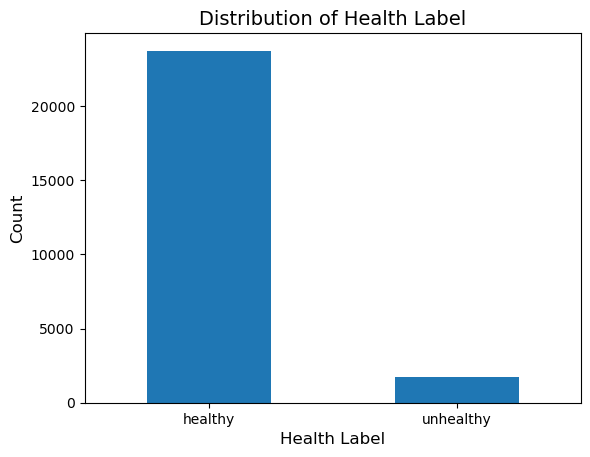

In [140]:

df_food['health_label'].value_counts().plot(kind='bar')
plt.title('Distribution of Health Label', fontsize=14)
plt.xlabel('Health Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0);
plt.savefig('../img/Distribution_of_Health_Labels.png')


The bar chart showing the distribution of health labels. The "Healthy" class dominates the dataset with significantly more samples compared to the "Not Healthy" class, illustrating the class imbalance visually. rt showing the distribution of health labels. The "Healthy" class dominates the dataset with significantly more samples compared to the "Not Healthy" class, illustrating the class imbalance visually. 

### Ingredients Exploration



#### Most Frequent Ingredients

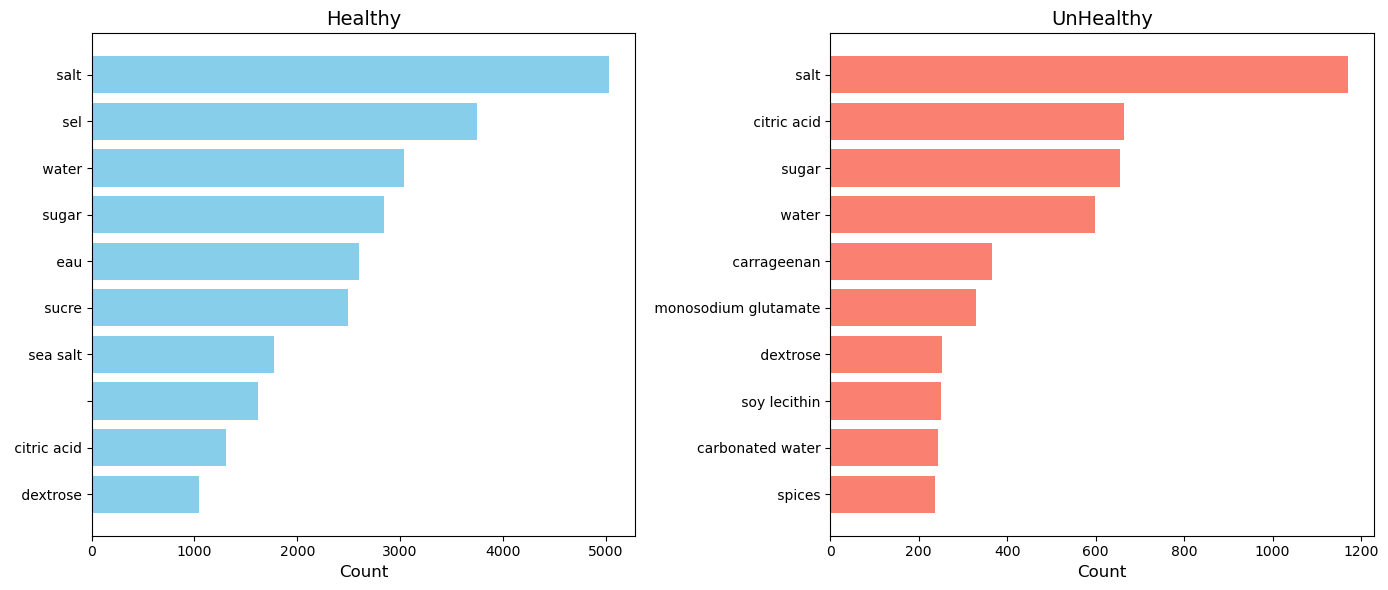

In [144]:
#https://www.datacamp.com/tutorial/pandas-explode
# split processed_ingredients into individual ingredients
healthy_ingredients = df_food[df_food['health_label'] == 'healthy']['processed_ingredients'].str.split(',').explode()
not_healthy_ingredients = df_food[df_food['health_label'] == 'unhealthy']['processed_ingredients'].str.split(',').explode()

# count the frequency of each ingredient
healthy_counts = Counter(healthy_ingredients)
not_healthy_counts = Counter(not_healthy_ingredients)

# 10 most frequent ingredients
top_healthy_ingredients = healthy_counts.most_common(10)
top_not_healthy_ingredients = not_healthy_counts.most_common(10)

# convert to dataFrame for visualization
healthy_df = pd.DataFrame(top_healthy_ingredients, columns=['Ingredient', 'Count'])
not_healthy_df = pd.DataFrame(top_not_healthy_ingredients, columns=['Ingredient', 'Count'])



fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Healthy Ingredients
axes[0].barh(healthy_df['Ingredient'], healthy_df['Count'], color='skyblue')
axes[0].set_title('Healthy', fontsize=14)
axes[0].set_xlabel('Count', fontsize=12)
axes[0].invert_yaxis()

# Not Healthy Ingredients
axes[1].barh(not_healthy_df['Ingredient'], not_healthy_df['Count'], color='salmon')
axes[1].set_title('UnHealthy', fontsize=14)
axes[1].set_xlabel('Count', fontsize=12)
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('../img/top_ten_ingredients.png')

#### Rare Ingredients Analysis.

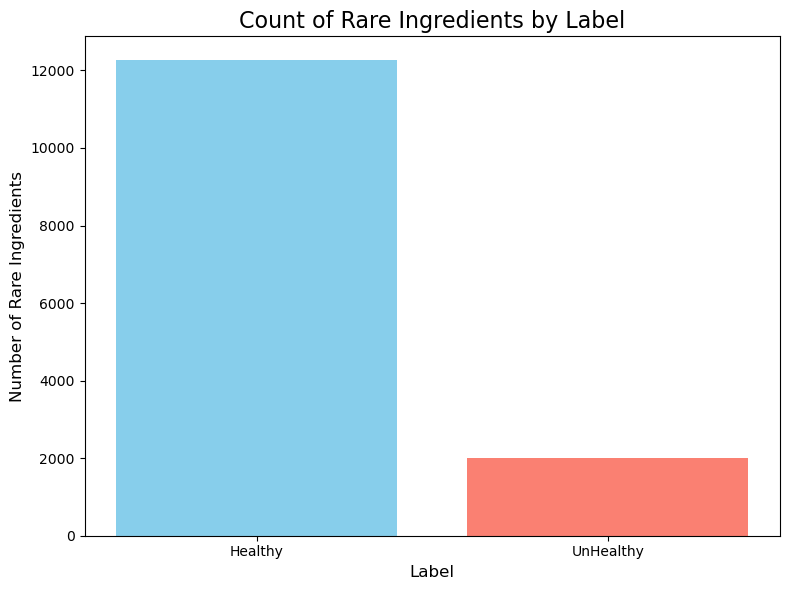

In [146]:
#  rare ingredients that occur only once in healthy foods
rare_ingredients_healthy = [ingredient for ingredient, count in healthy_counts.items() if count == 1]

#  rare ingredients that occur only once in not healthy foods
rare_ingredients_not_healthy = [ingredient for ingredient, count in not_healthy_counts.items() if count == 1]

# counts of rare ingredients for each label
num_rare_healthy = len(rare_ingredients_healthy)
num_rare_not_healthy = len(rare_ingredients_not_healthy)


labels = ['Healthy', 'UnHealthy']
counts = [num_rare_healthy, num_rare_not_healthy]

#  plot
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['skyblue', 'salmon'])
plt.title('Count of Rare Ingredients by Label', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Number of Rare Ingredients', fontsize=12)
plt.tight_layout()
plt.savefig('../img/number_of_rare_ingredients.png')


#### Number of Ingredients per Product

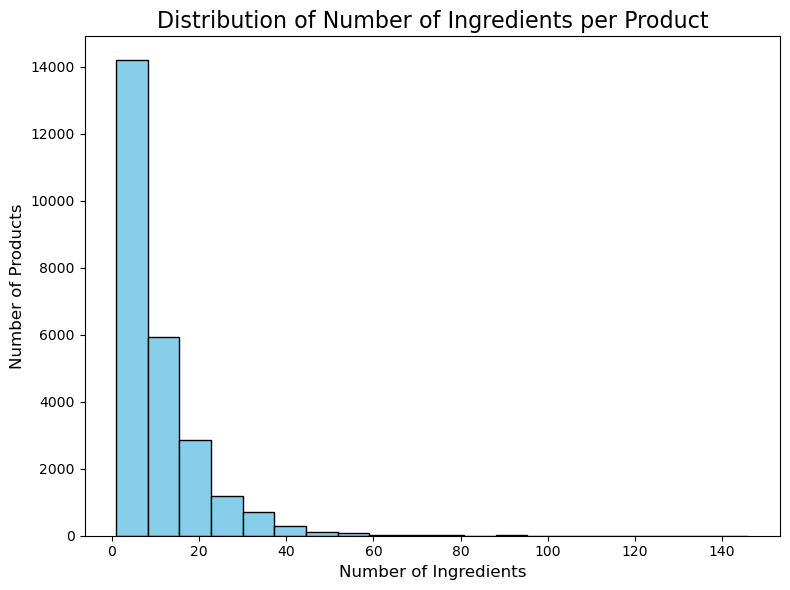

In [148]:
#number of ingredients per product
ingredient_lengths = df_food['processed_ingredients'].str.split(',').apply(len)


plt.figure(figsize=(8, 6))
plt.hist(ingredient_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Ingredients per Product', fontsize=16)
plt.xlabel('Number of Ingredients', fontsize=12)
plt.ylabel('Number of Products', fontsize=12);
plt.tight_layout()
plt.savefig('../img/number_of_ingredients_per_product.png')


The histogram likely shows a right-skewed distribution, meaning most products have a smaller number of ingredients, while a few products have a much larger number of ingredients.

### Analysis of Food Groups and Their Relationship to Health Labels

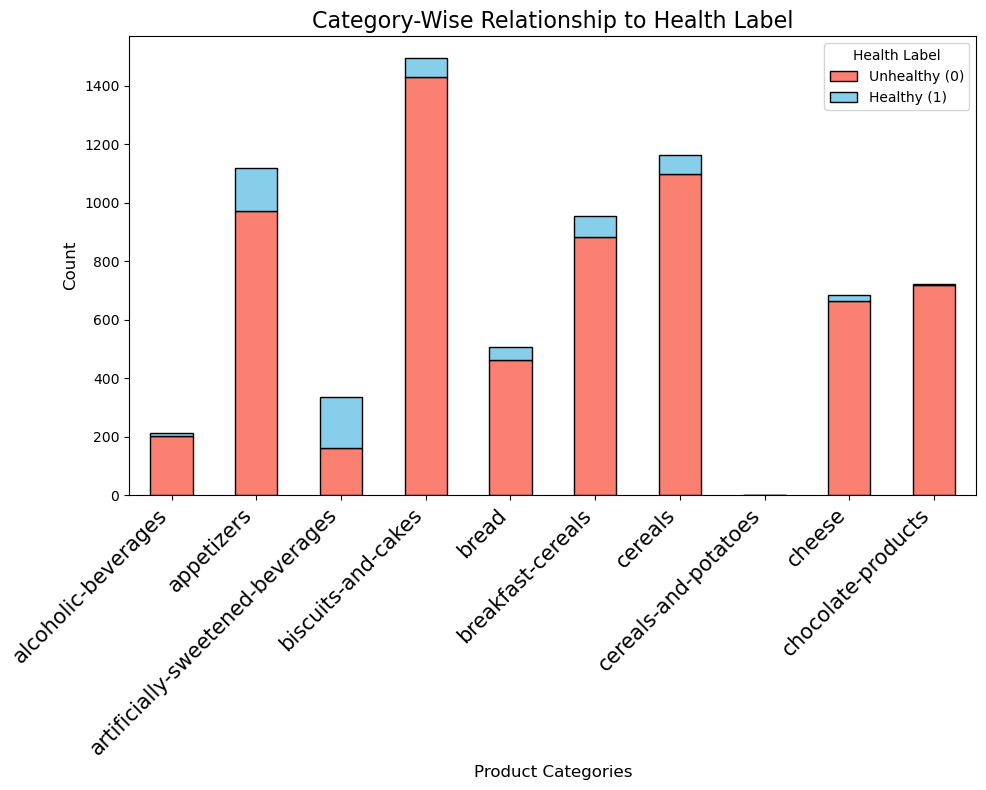

In [188]:
#remove the 'en:' from the food_category
df_food['filtered_food_groups'] =  df_food['food_groups'].str.replace('en:','')
# now group data for helath label with food_groups
category_health_counts = df_food.groupby(['filtered_food_groups', 'health_label']).size().unstack(fill_value=0)


# category-wise relationship to health label
category_health_counts.head(10).plot(kind='bar', stacked=True, figsize=(10, 8), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Category-Wise Relationship to Health Label', fontsize=16)
plt.xlabel('Product Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.legend(title='Health Label', labels=['Unhealthy (0)', 'Healthy (1)'])
plt.tight_layout()
plt.savefig('../img/foodgroups_healthlabels.png')

Most food categories, such as biscuits-and-cakes, cereals, and artificially-sweetened-beverages, are predominantly labeled as Not Healthy (red bars), indicating that these categories likely contain more products with ingredients linked to health concern,Categories like alcoholic beverages and chocolate products show very little or no Healthy representation, highlighting their alignment with unhealthy eating habits or ingredients.

In [153]:
#save the final dataset
df_food.to_csv('../data/cleaned_data/final_data.csv',index= False)